In [203]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [205]:
# depth of this file in the project
file_depth = '../..'

In [206]:
with open(file_depth + '/config/data_1m_config.json') as config_file:
    config = json.load(config_file)

movies_data_path = config['original_csv_movies_data']
ratings_data_path = config['original_csv_ratings_data']
users_data_path = config['original_csv_users_data']

In [207]:
movies = pd.read_csv(file_depth + movies_data_path)
movies

,movie_id,title,genres,movie_year
0,1,Toy Story (1995),Animation|ForChildren|Comedy,1995
1,2,Jumanji (1995),Adventure|ForChildren|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


In [208]:
users = pd.read_csv(file_depth + users_data_path)
users

,user_id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,1060


In [236]:
ratings = pd.read_csv(file_depth + ratings_data_path)
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [237]:
def date_from_timestamp(ratings_data):
    ratings_data['date'] = pd.to_datetime(ratings_data['timestamp'], unit='s')
    ratings_data['formatted_date'] = ratings_data['date'].dt.normalize()

    ratings_data['month'] = ratings_data['date'].dt.month
    ratings_data['year'] = ratings_data['date'].dt.year

    ratings_data.drop(columns=['date'], inplace=True)
    ratings_data.rename(columns={'formatted_date': 'date'}, inplace=True)
    
    return ratings_data

In [238]:
ratings = date_from_timestamp(ratings)

monthly_ratings = ratings.groupby(['year', 'month']).agg(rating_count=('user_id', 'size'), unique_users=('user_id', 'nunique')).reset_index()

#### ALL OF THE RATINGS

In [239]:
monthly_ratings

,year,month,rating_count,unique_users
0,2000,4,11396,86
1,2000,5,67437,486
2,2000,6,54486,508
3,2000,7,90334,778
4,2000,8,182109,1310
5,2000,9,52421,576
6,2000,10,42294,500
7,2000,11,290793,2357
8,2000,12,113487,1241
9,2001,1,18004,543


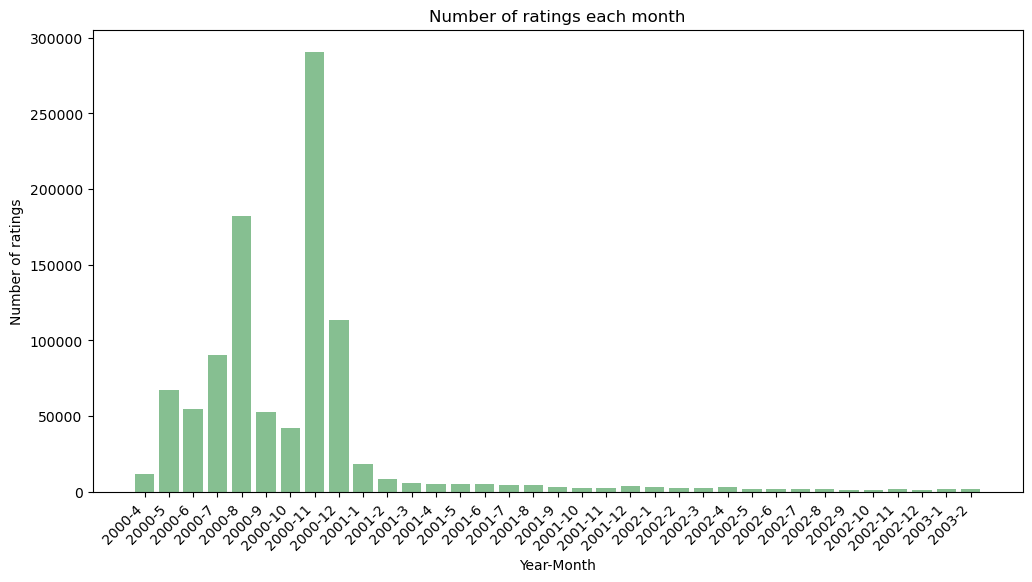

In [289]:
plt.figure(figsize=(12, 6))
plt.bar(monthly_ratings['year'].astype(str) + '-' + monthly_ratings['month'].astype(str), monthly_ratings['rating_count'], color='#86bf91')
plt.title('Number of ratings each month')
plt.xlabel('Year-Month')
plt.ylabel('Number of ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

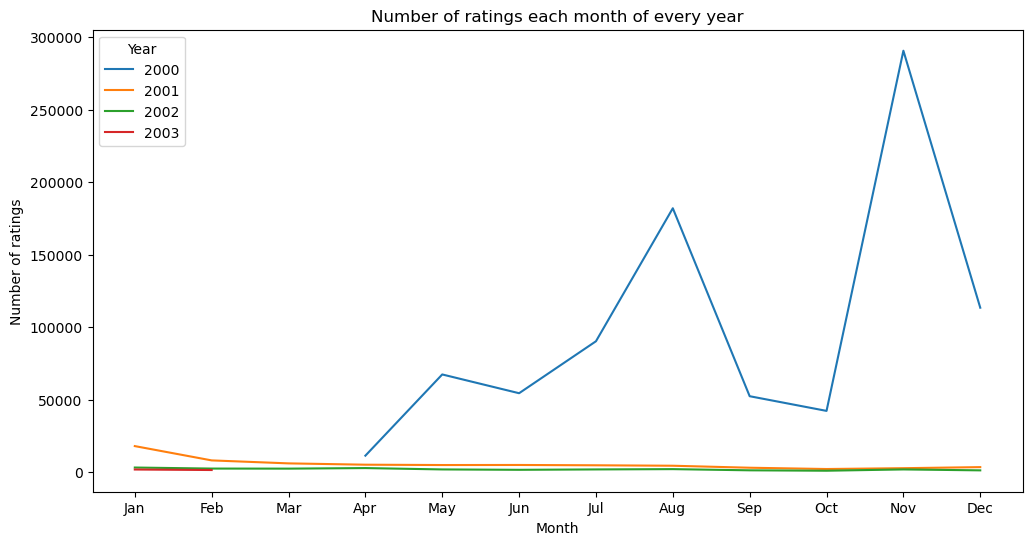

In [290]:

plt.figure(figsize=(12, 6))
for year in monthly_ratings['year'].unique():
    year_data = monthly_ratings[monthly_ratings['year'] == year]
    plt.plot(year_data['month'], year_data['rating_count'], label=str(year))

plt.title('Number of ratings each month of every year')
plt.xlabel('Month')
plt.ylabel('Number of ratings')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()

-------

In [251]:
file_depth = '../..'

with open(file_depth + '/config/data_1m_config.json') as config_file:
    config = json.load(config_file)

movies_data_path = config['original_csv_movies_data']
ratings_data_path = config['original_csv_ratings_data']
users_data_path = config['original_csv_users_data']

movies = pd.read_csv(file_depth + movies_data_path)
ratings = pd.read_csv(file_depth + ratings_data_path)
users = pd.read_csv(file_depth + users_data_path)

# get all unique genres
unique_genres = movies['genres'].str.split('|', expand=True).stack().unique()

# ratings of 4 or 5
filtered_ratings = ratings[(ratings['rating'] == 4) | (ratings['rating'] == 5)]

final_ratings = filtered_ratings.merge(movies, on='movie_id', how='inner').drop(columns=['title', 'movie_year', 'genres'])
final_ratings = date_from_timestamp(final_ratings)
final_ratings = final_ratings.drop(columns=['timestamp'])

grouped_data = final_ratings.groupby('user_id')

#### CUT MONTHLY RATINGS

In [241]:
monthly_cut_ratings = final_ratings.groupby(['year', 'month']).agg(rating_count=('user_id', 'size'), unique_users=('user_id', 'nunique')).reset_index()
monthly_cut_ratings

,year,month,rating_count,unique_users
0,2000,4,6263,86
1,2000,5,39852,486
2,2000,6,32658,506
3,2000,7,53570,769
4,2000,8,103372,1287
5,2000,9,30754,559
6,2000,10,24717,486
7,2000,11,166881,2334
8,2000,12,65298,1207
9,2001,1,10011,506


In [242]:
final_ratings

,user_id,movie_id,rating,date,month,year
0,1,1193,5,2000-12-31,12,2000
1,2,1193,5,2000-12-31,12,2000
2,12,1193,4,2000-12-30,12,2000
3,15,1193,4,2000-12-30,12,2000
4,17,1193,5,2000-12-30,12,2000
...,...,...,...,...,...,...
575276,5851,3607,5,2000-05-08,5,2000
575277,5854,3026,4,2000-05-14,5,2000
575278,5938,2909,4,2000-05-02,5,2000
575279,5948,1360,5,2002-03-19,3,2002


--------

In [243]:
with open('data_date_deviders/periods.json') as periods_file:
    periods = json.load(periods_file)

Devided ratings by months. Set the average to about 50k ratings per month, so we had to either merge or split some months. Merged months can already be seen in the periods.json file (start and end is more than 1 month apart) but months that needed to be split are have range of groups in the key value.

In [230]:
periods

{'01-02': {'start': '2000-04-01', 'end': '2000-05-31'},
 '03': {'start': '2000-06-01', 'end': '2000-06-30'},
 '04-05': {'start': '2000-07-01', 'end': '2000-07-31'},
 '06-09': {'start': '2000-08-01', 'end': '2000-08-31'},
 '10': {'start': '2000-09-01', 'end': '2000-09-30'},
 '11': {'start': '2000-10-01', 'end': '2000-10-31'},
 '12-17': {'start': '2000-11-01', 'end': '2000-11-30'},
 '18-19': {'start': '2000-12-01', 'end': '2000-12-31'},
 '20': {'start': '2001-01-01', 'end': '2001-06-30'},
 '21': {'start': '2001-07-01', 'end': '2003-02-28'}}

In [284]:
splits = []

for period in periods:

    start = periods[period]['start']
    end = periods[period]['end']
    print(f"Period: {period}, start: {start}, end: {end}")
    filtered_by_ranges = final_ratings[final_ratings['date'].between(start, end)]

    if "-" in period and len(period.split("-")) == 2:
        range_start, range_end = map(int, period.split("-"))
        ranges = list(range(range_start, range_end + 1))

        n = len(ranges)
        total_rows = len(filtered_by_ranges)

        for i in range(n):
            split_start = i * total_rows // n
            split_end = (i + 1) * total_rows // n
            splits.append(filtered_by_ranges.iloc[split_start:split_end])        
    else:
        splits.append(filtered_by_ranges)

Period: 01-02, start: 2000-04-01, end: 2000-05-31
Period: 03, start: 2000-06-01, end: 2000-06-30
Period: 04-05, start: 2000-07-01, end: 2000-07-31
Period: 06-09, start: 2000-08-01, end: 2000-08-31
Period: 10, start: 2000-09-01, end: 2000-09-30
Period: 11, start: 2000-10-01, end: 2000-10-31
Period: 12-17, start: 2000-11-01, end: 2000-11-30
Period: 18-19, start: 2000-12-01, end: 2000-12-31
Period: 20, start: 2001-01-01, end: 2001-06-30
Period: 21, start: 2001-07-01, end: 2003-02-28


In [288]:
print(f"Number of splits: {len(splits)}")

Number of splits: 21


In [220]:
def create_set():
    
    user_vectors = {}

    for user_id, group in grouped_data:
        user_genre_vectors = {}
        
        for genre in unique_genres:
            split_genres = group['genres'].str.split('|')
            movies_in_genre_count = split_genres.apply(lambda x: genre in x).sum()
            user_genre_vectors[genre] = int(movies_in_genre_count)

        user_vectors[user_id] = user_genre_vectors

# -------

In [ ]:
from scipy import spatial

user_category_file = 'user_category.json'
with open(user_category_file, 'r') as f:
  user_category = json.load(f)



target_user_id = 1

if type(target_user_id) == int:
    target_user_id = str(target_user_id)




user1 = list(user_category[target_user_id].values())

similarities = {}

for user_id, user_data in user_category.items():
    if user_id != target_user_id:  # Skip if it's the target user
        userx = list(user_data.values())
        similarity = 1 - spatial.distance.cosine(user1, userx)
        similarities[user_id] = similarity

# ------

In [116]:
# tail(20) - vratene id 15
sum_of_ratings_last_10 = monthly_ratings['rating_count'].tail(20).sum()
sum_of_ratings_last_10
# print("Sum of ratings from the last 10 records:", sum_of_ratings_last_10)

48138